# Constant Model Generalization

> range of X is -1 to 1

## <mark>Steps</mark>
1. define a problem dataset => (f(x) = sin(pi*x))
##### 2. Repeat {
- random 2 values from problem dataset
- use these weights to be as a parameter for model with a whole dataset.
- get y_hat from model prediction
- plot it
##### }
3. find the mean of model (mean of E_d)
4. compute bias and variance to get E_out

### ----------- utils -----------

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import dblquad

# Constant Model
def constantModel(X):
    return np.mean(np.sin(np.dot(np.pi, X)))

def meanModel():
    return 0

# Define the integrand
# def integrand(x1, x2):
#     return (np.sin(np.pi * x1) + np.sin(np.pi * x2)) / 2

# def meanModel(period):
#     result, _ = dblquad(integrand, -1, 1, lambda x1: -1, lambda x1: 1)
#     return result * (1 / period)


### ----------------------------

### step 1: define a problem dataset

In [20]:
# Define the function
def problem(X):
    return np.sin(np.dot(np.pi, X))

- Visualize it

(100,)


(-2.0, 2.0)

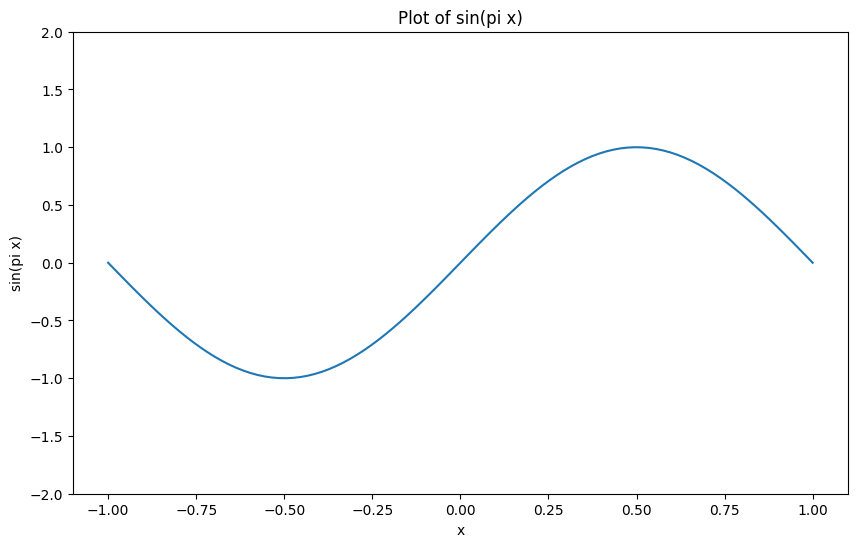

In [21]:
# Generate X features
X = np.linspace(-1, 1, 100)
print(X.shape)

# Compute y values
y = problem(X)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(X, y, label='sin(pi x)')
plt.title('Plot of sin(pi x)')
plt.xlabel('x')
plt.ylabel('sin(pi x)')
plt.ylim(-2, 2)

### step 2: prepare before compute E_out
##### Repeat {
- random 2 values from problem dataset
- use these 2 values to find optimal weights by normal equation
- use these weights to be as a parameter for model with a whole dataset.
- get y_hat from model prediction
- plot it
##### }

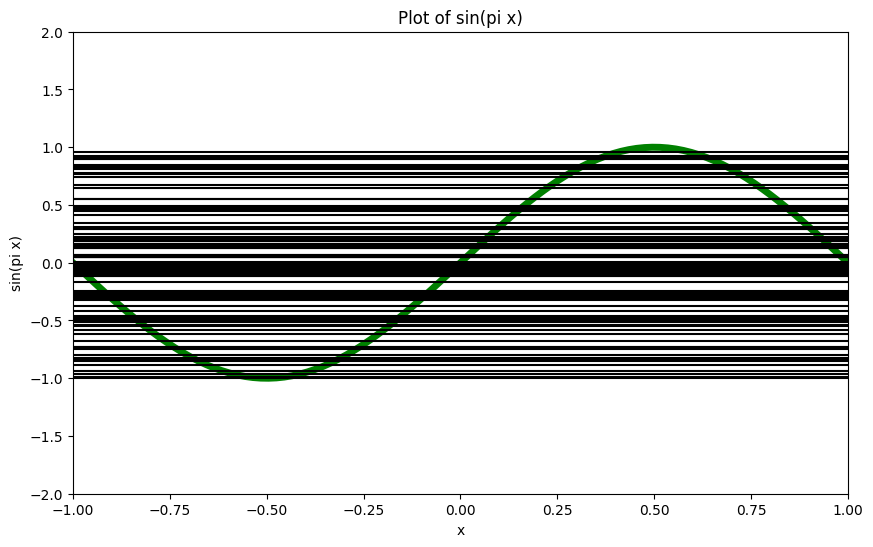

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(X, y, label='sin(pi x)', c="green", linewidth=5.0)
plt.title('Plot of sin(pi x)')
plt.xlabel('x')
plt.ylabel('sin(pi x)')
plt.ylim(-2, 2)
plt.xlim(-1, 1)

# every value from dataset that possible
E_d = []

for i in range(100):
    # random 2 values from problem dataset
    X_sample = np.random.choice(X, 2)
    y_sample = problem(X_sample)
    
    # use these weights to be as a parameter for model with a whole dataset.
    # get y_hat from model prediction
    y_pred = constantModel(X_sample)
    E_d.append(y_pred)
    
    # plot it
    plt.plot([-1, 1], [y_pred, y_pred], c="black", alpha=1)     


### step 3: find the mean of model (mean of E_d)

In [23]:
mean_model = meanModel()
mean_model

0

### step 4: compute bias and variance to get E_out

- bias

In [24]:
# bias^2 = mean of (mean_model - y)^2
z = np.square(mean_model - y)
bias = np.mean(z)
print(f"Bias: {bias:.2f}")

Bias: 0.49


- variance

In [25]:
# variance = mean of (mean of (every value from dataset that possible - mean_model))
z = np.square(np.array(E_d) - mean_model) # boardcasting
var_x = np.mean(z)
variance = np.mean(var_x)
print(f"Variance: {variance:.2f}")

Variance: 0.26


### step 5: Compute E_out

In [26]:
E_out = bias + variance
print(f"E_out: {E_out:.2f}")

E_out: 0.75


### Result

0


(-1.0, 1.0)

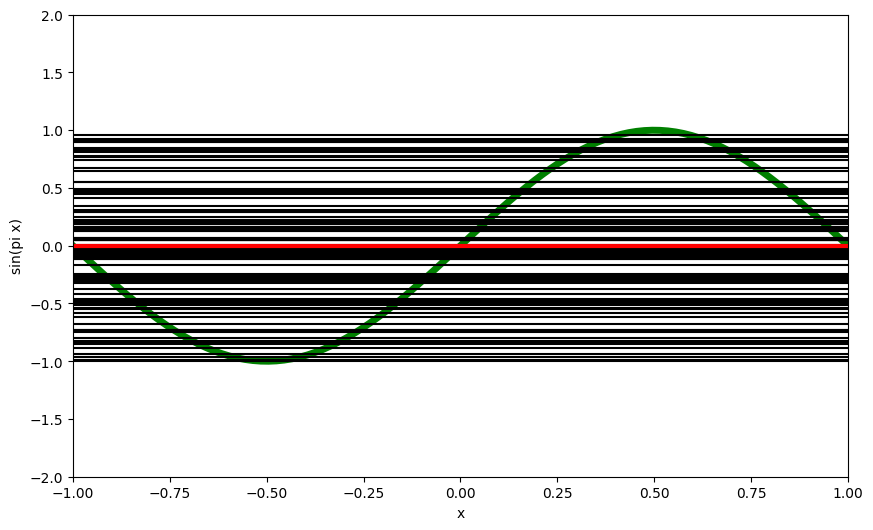

In [27]:
print(mean_model)
plt.figure(figsize=(10, 6))
plt.plot(X, y, label='sin(pi x)', c="green", linewidth=5.0)
plt.plot([-1, 1], [np.array(E_d).T, np.array(E_d).T], c="black", alpha=1) 
plt.axhline(mean_model, c="red", linewidth=3.0)
plt.xlabel('x')
plt.ylabel('sin(pi x)')
plt.ylim(-2, 2)
plt.xlim(-1, 1)